In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
df = pd.read_csv("C:/Users/Rohit/Downloads/house-prices-advanced-regression-techniques/train.csv")
df1 = pd.read_csv("C:/Users/Rohit/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [7]:
data1 = df.values
xt = df1.values
xtr = data1[ : , :-1]
ytr = data1[: ,-1:]


In [ ]:
mean = xtr.mean(axis = 0)
std = xtr.std(axis = 0)
mean = xt.mean(axis = 0)
std = xt.std(axis = 0)

In [5]:
xt1 = (xt-mean)/std
xtr1 = (xtr-mean)/std

In [6]:
ones1 = np.ones((xt1.shape[0],1))
ones = np.ones((xtr1.shape[0],1))

In [7]:
xt1 = np.hstack((ones1,xt1))
xtr1 = np.hstack((ones,xtr1))

In [10]:
xtr1.shape,xt1.shape,ytr.shape

((1600, 6), (400, 6), (1600, 1))

In [11]:
def hypo(xt,theta):
    return np.dot(xt,theta)

def error(xtr,ytr,theta):
    e = 0.0
    m = xtr.shape[0]
    y1 = hypo(xtr,theta)
    e = np.sum((y1-ytr)**2) 
    return e/m

def gradient(xtr,ytr,theta):
    m,n = xtr.shape
    yt = hypo(xtr,theta)
    grad = np.dot(xtr.T,(yt-ytr))
    return grad/m
def descenttt(xtr,ytr,rate = 0.01,epochs = 300,batchsize = 20):
    m,n = xtr.shape
    errorlist = []
    theta = np.zeros((n,))
    data = np.hstack((xtr,ytr.reshape(-1,1)))
    for i in range(epochs):
        np.random.shuffle(data)
        r = data.shape[0]
        batch = r//batchsize
        for j in range(batch):
            batchdata = data[j*batchsize:(j+1)*batchsize,:]
            xx = batchdata[ : , :-1]
            yy = batchdata[ : ,-1]
            grad = gradient(xx,yy,theta)
            theta = theta - rate*grad
            ef = error(xx,yy,theta)
            errorlist.append(ef)

    return theta,errorlist

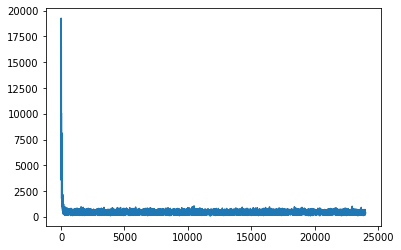

In [13]:
theta,errorl = descenttt(xtr1,ytr)
plt.plot(errorl)

In [14]:
yy = hypo(xt1,theta)

In [15]:
yy.shape

(400,)

In [1]:
ab = pd.DataFrame(yy,columns = ['target'])

NameError: name 'pd' is not defined

In [18]:
ab.to_csv('test11.csv')